# Task 1: Project Overview and Import Modules

In [1]:
#%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
np.random.seed(0)
plt.style.use("ggplot")

import tensorflow as tf
print('Tensorflow version:', tf.__version__)
print('GPU detected:', tf.config.list_physical_devices('GPU'))

Tensorflow version: 2.6.0
GPU detected: []


# Task 2: Load and Explore the NER Dataset

In [ ]:
#La colonne "Sentence #" représente l'identifiant de la phrase.
#La colonne Word représente un des mots de la phrase.
#La colonne POS donne la nature grammatical de notre mot.
#La colonne Tag correspond à l'entité que l'on recherchera à prédire. pour appliquer une première mise sous forme des données.

In [2]:
df = pd.read_csv("ner_dataset.csv", encoding="latin1")
df = df.fillna(method="ffill") # filling null values
df.head()

,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,Sentence: 1,of,IN,O
2,Sentence: 1,demonstrators,NNS,O
3,Sentence: 1,have,VBP,O
4,Sentence: 1,marched,VBN,O


In [3]:
df = df.drop('POS',  1)
df = df.groupby('Sentence #').agg(list)
df = df.reset_index(drop=True)
df.head()
#Essential info about tagged entities:

#geo = Geographical Entity
#org = Organization
#per = Person
#gpe = Geopolitical Entity
#tim = Time indicator
#art = Artifact
#eve = Event
#nat = Natural Phenomenon

<ipython-input-3-a3adab63b190>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop('POS',  1)


,Word,Tag
0,"[Thousands, of, demonstrators, have, marched, ...","[O, O, O, O, O, O, B-geo, O, O, O, O, O, B-geo..."
1,"[Iranian, officials, say, they, expect, to, ge...","[B-gpe, O, O, O, O, O, O, O, O, O, O, O, O, O,..."
2,"[Helicopter, gunships, Saturday, pounded, mili...","[O, O, B-tim, O, O, O, O, O, B-geo, O, O, O, O..."
3,"[They, left, after, a, tense, hour-long, stand...","[O, O, O, O, O, O, O, O, O, O, O]"
4,"[U.N., relief, coordinator, Jan, Egeland, said...","[B-geo, O, O, B-per, I-per, O, B-tim, O, B-geo..."


In [ ]:
##Afficher quelques observations des données mises en forme (prêt pour le modèle).



In [4]:
#Looking for null values
print(df.isnull().sum())

Word    0
Tag     0
dtype: int64


In [5]:
import pandas as pd
df1 = pd.read_csv("ner_dataset.csv", encoding="latin1")
df1 = df1.fillna(method="ffill") # filling null values
#df.head()
#Filling Null Values
df1.head()

,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,Sentence: 1,of,IN,O
2,Sentence: 1,demonstrators,NNS,O
3,Sentence: 1,have,VBP,O
4,Sentence: 1,marched,VBN,O


In [6]:
print("Unique Words in corpus:",df1['Word'].nunique())
print("Unique Tag in corpus:",df1['Tag'].nunique())

Unique Words in corpus: 35178
Unique Tag in corpus: 17


In [7]:
#Storing unique words and tags as a list
words = list(set(df1['Word'].values))
words.append("ENDPAD")
num_words = len(words)

In [8]:
tags = list(set(df1['Tag'].values))
num_tags = len(tags)

In [9]:
num_words, num_tags

(35179, 17)

# Task 3: Retrieve Sentences and Corresponsing Tags

In [10]:
#Creating a class to get data in desired formate. i.e. Word,POS,Tag
class SentanceGetter(object):
    def __init__(self,df1):
        self.n_sent = 1 #counter
        self.df1 = df1
        agg_func = lambda s:[(w,p,t) for w,p,t in zip(s['Word'].tolist(),s['POS'].tolist(),s['Tag'].tolist())]
        self.grouped = self.df1.groupby("Sentence #").apply(agg_func)
        self.sentances = [s for s in self.grouped]

In [11]:
getter = SentanceGetter(df1)
sentances = getter.sentances

In [12]:
sentances[0]

[('Thousands', 'NNS', 'O'),
 ('of', 'IN', 'O'),
 ('demonstrators', 'NNS', 'O'),
 ('have', 'VBP', 'O'),
 ('marched', 'VBN', 'O'),
 ('through', 'IN', 'O'),
 ('London', 'NNP', 'B-geo'),
 ('to', 'TO', 'O'),
 ('protest', 'VB', 'O'),
 ('the', 'DT', 'O'),
 ('war', 'NN', 'O'),
 ('in', 'IN', 'O'),
 ('Iraq', 'NNP', 'B-geo'),
 ('and', 'CC', 'O'),
 ('demand', 'VB', 'O'),
 ('the', 'DT', 'O'),
 ('withdrawal', 'NN', 'O'),
 ('of', 'IN', 'O'),
 ('British', 'JJ', 'B-gpe'),
 ('troops', 'NNS', 'O'),
 ('from', 'IN', 'O'),
 ('that', 'DT', 'O'),
 ('country', 'NN', 'O'),
 ('.', '.', 'O')]

In [ ]:
#Définir un modèle permettant de résoudre ce problème et afficher son résumé.


# Task 4: Define Mappings between Sentences and Tags

In [13]:
word2idx =  {w : i+1 for i,w in enumerate(words)}#and the same applies for the named entities but we need to map our labels to numbers this time:
tag2idx  =  {t : i for i,t in enumerate(tags)}
#enumerate nous permet d'itérer à travers une séquence mais il garde une trace à la fois de l'index et de l'élément

In [14]:
word2idx

{'1,850': 1,
 'noncolonial': 2,
 'lowland': 3,
 'sultanate': 4,
 'boisterous': 5,
 'surface-to-air': 6,
 'Uninsured': 7,
 '2500': 8,
 'deprivation': 9,
 'Hat': 10,
 'efficiency': 11,
 'Seitov': 12,
 'Billionaire': 13,
 'Canaries': 14,
 'bribed': 15,
 '11.5': 16,
 '1.55': 17,
 'oil-rich': 18,
 'Mohamad': 19,
 'leveling': 20,
 'flattening': 21,
 'negative': 22,
 'formation': 23,
 'ambushes': 24,
 'treat': 25,
 'Johnston': 26,
 'Matabeleland': 27,
 'bulletproof': 28,
 'downpours': 29,
 'November': 30,
 'ultra-orthodox': 31,
 'predict': 32,
 'Charter': 33,
 'producer': 34,
 'head': 35,
 'Two-million': 36,
 'equal': 37,
 'owe': 38,
 'assailed': 39,
 'Mexicali': 40,
 'AC': 41,
 'Tribal': 42,
 'Ahvaz': 43,
 'Integrationist': 44,
 'Perpetual': 45,
 'conform': 46,
 'touch-screen': 47,
 'visitor': 48,
 '0': 49,
 'mean': 50,
 'native': 51,
 'restrict': 52,
 'solved': 53,
 'descend': 54,
 'lessons': 55,
 "'T": 56,
 'Ordina': 57,
 'uncontrolled': 58,
 'Anderson': 59,
 'Face': 60,
 'irresponsibly': 

# Task 5: Padding Input Sentences and Creating Train/Test Splits

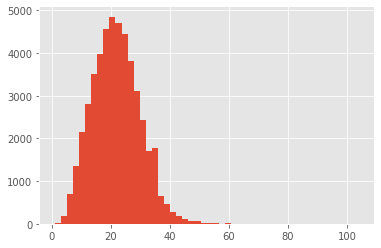

In [15]:
plt.hist([len(s) for s in sentances], bins=50)
plt.show()


In [ ]:
'''from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

max_len = 50

X = [[word2idx[w[0]] for w in s]for s in sentances]
X = pad_sequences(maxlen = max_len , sequences =X, padding='post', value =num_words-1)

y = [[tag2idx[w[2]] for w in s]for s in sentances]
y = pad_sequences(maxlen = max_len , sequences =y, padding='post', value =tag2idx["O"])
y = [to_categorical(i, num_classes=num_tags) for i in y]
y = [to_categorical(i, num_classes=num_tags) for i in y]'''

In [ ]:
#Justifier la fonction de perte qui sera utilisée pour entraîner ce modèle.

In [17]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
max_len = 50
X = [[word2idx[w[0]] for w in s] for s in sentances]
X = pad_sequences(maxlen=max_len, sequences=X, padding="post", value=num_words-1)
y = [[tag2idx[w[2]] for w in s] for s in sentances]
y = pad_sequences(maxlen=max_len, sequences=y, padding="post", value=tag2idx["O"])

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Task 6: Build and Compile a Bidirectional LSTM Model

In [20]:
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import LSTM, Embedding, Dense
from tensorflow.keras.layers import TimeDistributed, SpatialDropout1D, Bidirectional

In [21]:
input_word = Input(shape=(max_len,))
model = Embedding(input_dim=num_words, output_dim=50, input_length=max_len)(input_word)
model = SpatialDropout1D(0.1)(model)
model = Bidirectional(LSTM(units=100, return_sequences=True, recurrent_dropout=0.1))(model)
out = TimeDistributed(Dense(num_tags, activation="softmax"))(model)
model = Model(input_word, out)
model.summary()
 

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 50)]              0         
_________________________________________________________________
embedding (Embedding)        (None, 50, 50)            1758950   
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 50, 50)            0         
_________________________________________________________________
bidirectional (Bidirectional (None, 50, 200)           120800    
_________________________________________________________________
time_distributed (TimeDistri (None, 50, 17)            3417      
Total params: 1,883,167
Trainable params: 1,883,167
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#the summary shows that we have 1.88 million of parameters to be trained.
#Now let’s compile our model and specify the loss function, the matrix we want to track, and the optimizer function. We’ll use adam optimizer here, sparce_categorical_crossentropy
#as the loss function and the matrix we gonna concern is accuracy matrix.

In [22]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# Task 7: Train the Model

In [23]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from livelossplot.tf_keras import PlotLossesCallback

In [ ]:
#Then all we have left to start training is to call model.fit() 
#, and we’ll pass our training data which is x_train and y_train. 
#Then we’ll create our validation data by further splitting training data.
#You can increase the batch_size if you have GPU of more memory size. 
#Here we will use just 3 epochs as it takes more than 10 to 15 minutes to train the model if we use more epochs

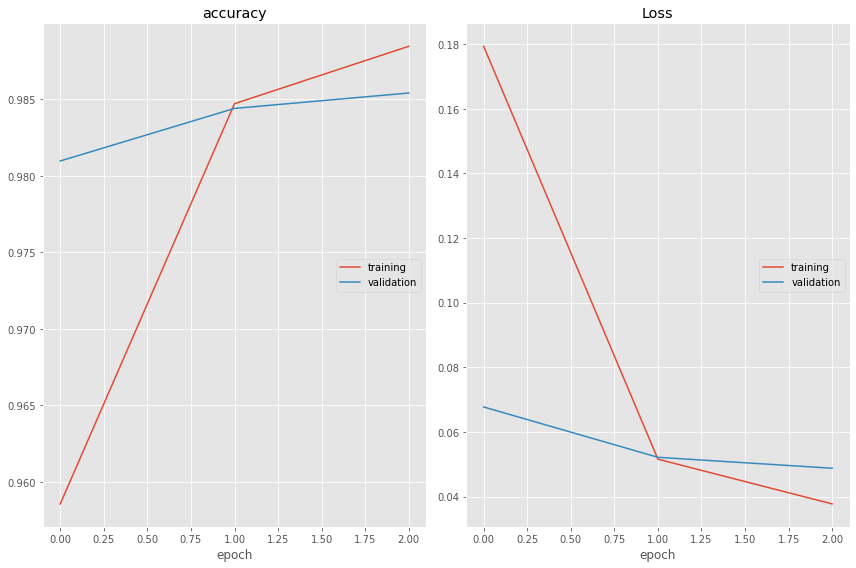

accuracy
	training         	 (min:    0.959, max:    0.988, cur:    0.988)
	validation       	 (min:    0.981, max:    0.985, cur:    0.985)
Loss
	training         	 (min:    0.038, max:    0.179, cur:    0.038)
	validation       	 (min:    0.049, max:    0.068, cur:    0.049)

Epoch 00003: val_loss improved from 0.05216 to 0.04878, saving model to model_weights.h5
Wall time: 26min 46s


In [24]:
%%time
chkpt = ModelCheckpoint("model_weights.h5", monitor='val_loss',verbose=1, save_best_only=True, save_weights_only=True, mode='min')
early_stopping = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=2, verbose=0, mode='max', baseline=None, restore_best_weights=False)
callbacks = [PlotLossesCallback(), chkpt, early_stopping]
history = model.fit(
    x=x_train,
    y=y_train,
    validation_data=(x_test,y_test),
    batch_size=32, 
    epochs=3,
    callbacks=callbacks,
    verbose=1
)

In [ ]:
#We can see at the bottom right end that the accuracy of our model is more than 98% .


# Task 8: Evaluate Named Entity Recognition Mode

In [26]:
model.evaluate(x_test, y_test)

300/300 [==============================] - 20s 68ms/step - loss: 0.0488 - accuracy: 0.9854


[0.04877837747335434, 0.9854065775871277]

# PREDICTION

In [27]:
i = np.random.randint(0, x_test.shape[0]) #659
p = model.predict(np.array([x_test[i]]))
p = np.argmax(p, axis=-1)
y_true = y_test[i]
print("{:15}{:5}\t {}\n".format("Word", "True", "Pred"))
print("-" *30)
for w, true, pred in zip(x_test[i], y_true, p[0]):
    print("{:15}{}\t{}".format(words[w-1], tags[true], tags[pred]))

Word           True 	 Pred

------------------------------
The            O	O
United         B-org	B-org
Nations        I-org	I-org
has            O	O
been           O	O
under          O	O
fire           O	O
for            O	O
failing        O	O
to             O	O
stop           O	O
ongoing        O	O
ethnic         O	O
violence       O	O
in             O	O
Ituri          B-geo	B-geo
.              O	O
Dubai-based    O	O
Dubai-based    O	O
Dubai-based    O	O
Dubai-based    O	O
Dubai-based    O	O
Dubai-based    O	O
Dubai-based    O	O
Dubai-based    O	O
Dubai-based    O	O
Dubai-based    O	O
Dubai-based    O	O
Dubai-based    O	O
Dubai-based    O	O
Dubai-based    O	O
Dubai-based    O	O
Dubai-based    O	O
Dubai-based    O	O
Dubai-based    O	O
Dubai-based    O	O
Dubai-based    O	O
Dubai-based    O	O
Dubai-based    O	O
Dubai-based    O	O
Dubai-based    O	O
Dubai-based    O	O
Dubai-based    O	O
Dubai-based    O	O
Dubai-based    O	O
Dubai-based    O	O
Dubai-based    O	O
Dubai-based    O	O
Dubai